# Hierarchical Clustering

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

## Using the dendrogram to find the optimal number of clusters

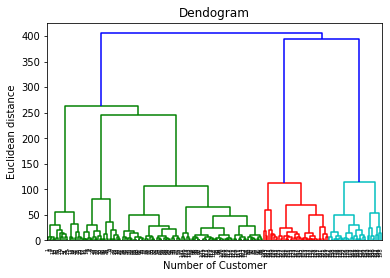

In [ ]:
import scipy.cluster.hierarchy as sch 
dendogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title("Dendogram")
plt.xlabel("Number of Customer")
plt.ylabel("Euclidean distance")
plt.show()


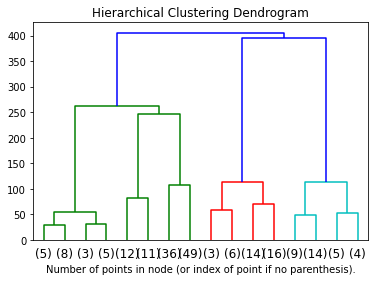

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(Agg_cluster, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(Agg_cluster.children_.shape[0])
    n_samples = len(Agg_cluster.labels_)
    for i, merge in enumerate(Agg_cluster.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([Agg_cluster.children_, Agg_cluster.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
Agg_cluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

Agg_cluster = Agg_cluster.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(Agg_cluster, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## Training the Hierarchical Clustering model on the dataset

In [ ]:
from sklearn.cluster import AgglomerativeClustering
Agg_cluster= AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc  = Agg_cluster.fit_predict(X)


## Visualising the clusters

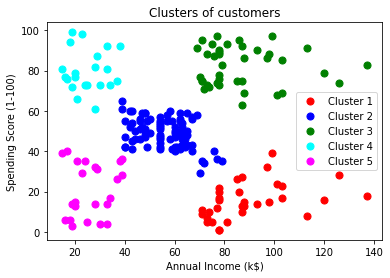

In [ ]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()